In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D, Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
#lets import the dataset
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
print(f"Training images shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Training images shape: {x_test.shape}")
print(f"Training labels shape: {y_test.shape}")

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Training images shape: (10000, 32, 32, 3)
Training labels shape: (10000, 1)


In [ ]:
Num_classes = 10
classes = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

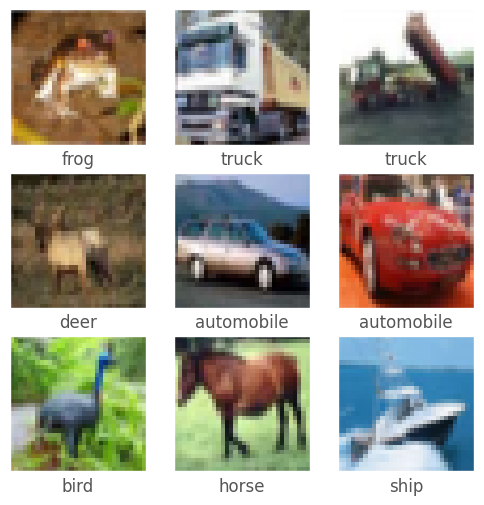

In [ ]:
#visualize the dataset
plt.figure(figsize = (6, 6))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(classes[y_train[i].item()])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

plt.show();

In [ ]:
##Normalize the Images
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
#check the images
x_train[0].dtype , x_train[0].max(), x_train[0].min()

(dtype('float32'), 1.0, 0.0)

In [ ]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train,Num_classes)
y_test = to_categorical(y_test, Num_classes)

In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Build Model

In [ ]:
model = Sequential()

In [ ]:
## add our first conv layer
model.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    strides = (1,1),
    padding = 'same',
    activation = 'relu',
    input_shape = (32,32,3)
))

In [ ]:
model.add(
    MaxPool2D(
        pool_size = (2, 2),
        padding = 'same',
        )
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## add our second Layer
model.add(Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(2,2))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144 (39.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#add third conv layer
model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
Total params: 28640 (111.88 KB)
Trainable params: 2864

### Adding classification Laters

In [ ]:
## Adding Flatten Layer
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 4096)             

In [ ]:
model.add(Dense(256,activation = 'relu'))

#output Layer

model.add(Dense(Num_classes, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 4096)             

In [ ]:
optimizer = Adam(learning_rate= 0.01)

In [ ]:
model.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

### Training Model

In [ ]:
Epochs = 50
Batch_size = 128

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs = Epochs,
    batch_size = Batch_size,
    shuffle = True,
    validation_data = (x_test,y_test)

)

Epoch 1/50
391/391 [==============================] - 8s 9ms/step - loss: 1.8621 - accuracy: 0.3239 - val_loss: 1.5871 - val_accuracy: 0.4211
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.4422 - accuracy: 0.4818 - val_loss: 1.3876 - val_accuracy: 0.4956
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.3266 - accuracy: 0.5254 - val_loss: 1.3351 - val_accuracy: 0.5277
Epoch 4/50
391/391 [==============================] - 3s 7ms/step - loss: 1.2375 - accuracy: 0.5584 - val_loss: 1.3279 - val_accuracy: 0.5271
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.1832 - accuracy: 0.5758 - val_loss: 1.3149 - val_accuracy: 0.5411
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.1341 - accuracy: 0.5942 - val_loss: 1.3071 - val_accuracy: 0.5374
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.0846 - accuracy: 0.6120 - val_loss: 1.3202 - val_accuracy: 0.5329
Epoch 

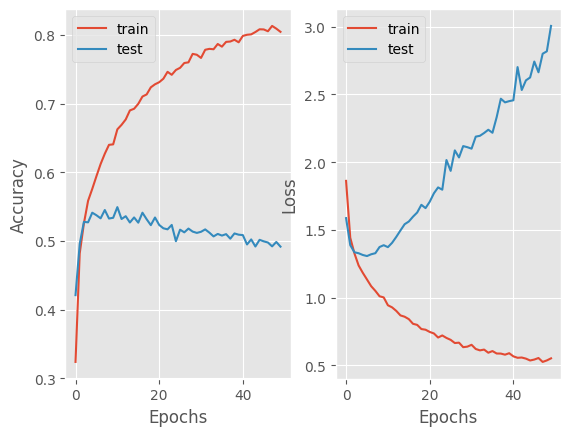

In [ ]:
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

## Solving problem of Overfitting

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Conv2D(32,(3,3),padding='same',activation = 'relu',input_shape = (32,32,3)))
model2.add(MaxPool2D((2,2)))

In [ ]:
model2.add(Conv2D(32,(3,3),padding='same',activation = 'relu',input_shape = (32,32,3)))
model2.add(MaxPool2D((2,2)))

model2.add(Dropout(0.3))

In [ ]:
model2.add(Conv2D(32,(3,3),padding='same',activation = 'relu',input_shape = (32,32,3)))
model2.add(MaxPool2D((2,2)))

model2.add(Dropout(0.3))

In [ ]:
model2.add(Flatten())

In [ ]:
model2.add(Dense(256 , activation = 'relu'))
model2.add(Dropout(0.3))

model2.add(Dense(Num_classes , activation = 'softmax'))

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 32)         

# Add a simple learning rate Scheduler

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
def simple_decay(epoch , lr):

  if epoch < 30:
    lrate = lr
  elif epoch <60:
    lrate = 0.0005
  else:
    lrate = 0.0001
  return lrate

In [ ]:
scheduler = LearningRateScheduler(simple_decay)

In [ ]:
callbacks = [scheduler]

In [ ]:
optimizer = Adam(learning_rate= 0.001)

In [ ]:
model2.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history2 = model2.fit(
    x_train,
    y_train,
    epochs = 100,
    shuffle = True,
    validation_data = (x_test,y_test),
    callbacks = callbacks
)

Epoch 1/100
1563/1563 [==============================] - 12s 6ms/step - loss: 1.6224 - accuracy: 0.3993 - val_loss: 1.2785 - val_accuracy: 0.5359 - lr: 0.0010
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3040 - accuracy: 0.5288 - val_loss: 1.1484 - val_accuracy: 0.5858 - lr: 0.0010
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1934 - accuracy: 0.5725 - val_loss: 1.0853 - val_accuracy: 0.6249 - lr: 0.0010
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1155 - accuracy: 0.6016 - val_loss: 0.9823 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0708 - accuracy: 0.6197 - val_loss: 0.9276 - val_accuracy: 0.6747 - lr: 0.0010
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0262 - accuracy: 0.6336 - val_loss: 0.9007 - val_accuracy: 0.6876 - lr: 0.0010
Epoch 7/100
1563/1563 [============================

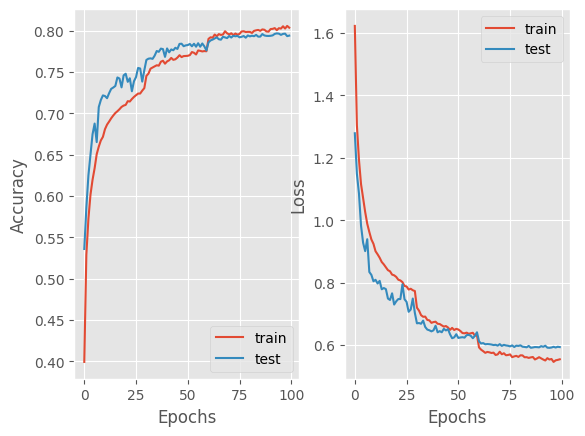

In [ ]:
plt.subplot(121)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.subplot(122)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()